# Linear Regression Analysis
---
**Research question**: "How many friends does a person have based on how much time they spend alone, post online, and whether they go outside and attend social events?"

I want to estimate how many friends a person may have based on time spent alone, how often they post online, and whether they attend social events when going outside (interaction).

$y = Friend\ Circle\ Size$

$\beta_0 = Intercept$

$\beta_1 = Time\ spent\ alone$

$\beta_2 = Post\ frequency$

$\beta_3 = Going\ outside$

$\beta_4 = Social\ event\ attendance$

$$y = \beta_0 + \beta_1x + \beta_2z + \beta_2*\beta_3$$

In [40]:
import numpy as np
# Receive dataframe from Preprocessing
%store -r pre_df

np.random.seed(9876789)

ra_df = pre_df

In [77]:
from IPython.display import display_html

def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(
        html_str.replace('table','table style="display:inline"'), 
        raw=True
    )

In [86]:
import numpy as np
import pandas as pd

# See: https://ayoakin.medium.com/linear-regression-from-scratch-using-matrices-991df6e28f62

X = ra_df[["Time_spent_Alone", "Post_frequency", "Going_outside", "Social_event_attendance"]].copy()
X["Going_outside:Social_event_attendance"] = ra_df["Going_outside"] * ra_df["Social_event_attendance"]
y = ra_df[["Friends_circle_size"]].copy()

# Append column of 1s
X["Intercept"] = 1

# Transpose
X_T = X.T

# Calculate beta 1 using matrix form
B = np.linalg.inv(X_T @ X) @ (X_T @ y)

B.index = X.columns

# Compute predictions of y-hat using beta 1
predictions = X @ B

# Calculate Sum of Squares
SSR = ((y - predictions) ** 2).sum()
# Calculate Sum of Squares total
SST = ((y - y.mean()) ** 2).sum()
# Calculate R^2
R2 = 1 - (SSR / SST)

residuals = y - predictions

print("\nR-Squared: {}".format(R2.iloc[0]))
display_side_by_side(B, residuals.head())


R-Squared: 0.629490394458234


,Friends_circle_size
Time_spent_Alone,-0.259140
Post_frequency,0.216059
Going_outside,0.576730
Social_event_attendance,0.496934
Going_outside:Social_event_attendance,-0.026988
Intercept,3.413500
,Friends_circle_size
0,4.742357
1,-1.729420
2,1.890221


In [87]:
from statsmodels.formula.api import ols

# Check results using statsmodels
model = ols(
    formula='Friends_circle_size ~ + Time_spent_Alone + Post_frequency + Going_outside*Social_event_attendance',
    data=ra_df
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Friends_circle_size   R-squared:                       0.629
Model:                             OLS   Adj. R-squared:                  0.629
Method:                  Least Squares   F-statistic:                     983.4
Date:                 Sat, 05 Jul 2025   Prob (F-statistic):               0.00
Time:                         17:57:11   Log-Likelihood:                -6858.7
No. Observations:                 2900   AIC:                         1.373e+04
Df Residuals:                     2894   BIC:                         1.377e+04
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 3.4135      0.243     14.034      0.000       2.937       3.890
Time_spent_Alone                         -0.2591      0.023    -11.140      0.000      -0.305      -0.214
Post_frequency                            0.2161      0.028      7.608      0.000       0.160       0.272
Going_outside                             0.5767      0.061      9.529      0.000       0.458       0.695
Social_event_attendance                   0.4969      0.048     10.276      0.000       0.402       0.592
Going_outside:Social_event_attendance    -0.0270      0.012     -2.344      0.019      -0.050      -0.004
==============================================================================
Omnibus:                       48.372   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.360
Skew:                           0.230   Prob(JB):                     1.04e-09
Kurtosis:                       2.638   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Plot regression model

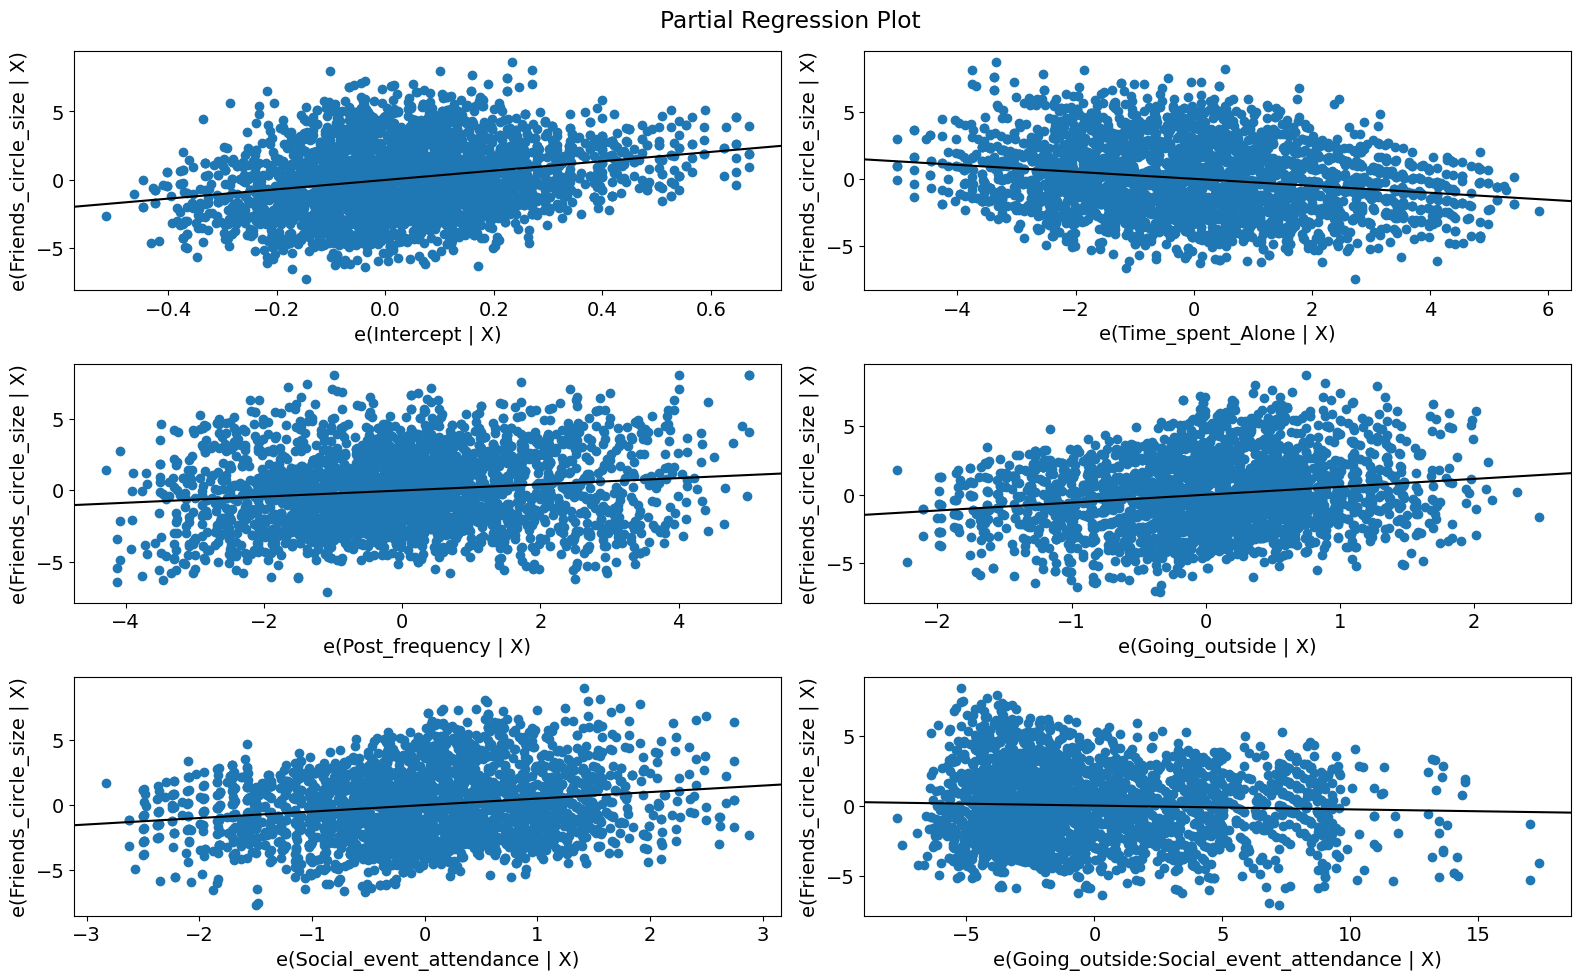

In [102]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(16, 10))
plt.rc("font", size=14)

fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1.0)

### Determine Fitness of Residuals

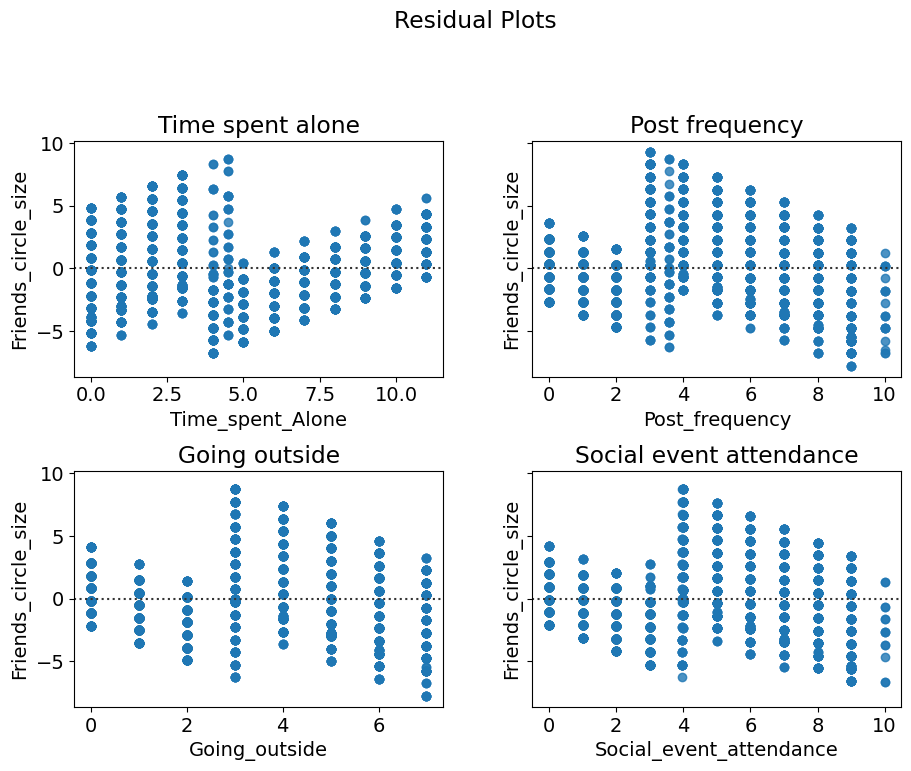

In [97]:
# import matplotlib.pyplot as plt/
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharey=True)
fig.suptitle("Residual Plots")
fig.tight_layout(pad=3.0)

plots_info = [
    {
        "name": "Time_spent_Alone",
        "title": "Time spent alone",
        "axes": (0, 0)
    },
    {
        "name": "Post_frequency",
        "title": "Post frequency",
        "axes": (0, 1)
    },
    {
        "name": "Going_outside",
        "title": "Going outside",
        "axes": (1, 0)
    },
    {
        "name": "Social_event_attendance",
        "title": "Social event attendance",
        "axes": (1, 1)
    },
]

for plot in plots_info:
    y_axis = plot["axes"][0]
    x_axis = plot["axes"][1]
    position = axes[y_axis, x_axis]
    sns.residplot(ra_df, x=plot["name"], y="Friends_circle_size", ax=position)
    position.set_title(plot["title"])


## Prediction

In [82]:
B.iloc[0]*1.0 + B.iloc[1]*4.0+ B.iloc[2]*4.0

Friends_circle_size    2.912019
dtype: float64